In [59]:
def get_metrics(input_file):
    print("input file: ", input_file)
    f = open(input_file,"r")
    fl = f.readlines()
    f.close()

    count = 1
    metrics = []
    file_name = input_file.split(".")[0]
    split_title = file_name.split("_")
    metrics.extend([float(split_title[3])])
    for line in fl:
    #     print(line)
        if count >= 32 and count < 37:
            _, val_str = line.split(":") 
            if defocus.match(line):
                val=float(val_str.split(",")[0])
                metrics.append(val)
    #             print(val)
            if score.match(line):
                val=float(val_str)
                metrics.append(val)
    #             print(val)
            if thon_rings.match(line):
                val=float(val_str.split("Angstroms")[0])
                metrics.append(val)
    #             print(val)
        count+=1
    all_metrics[split_title[0]].append(metrics)

In [61]:
import sys
import re
import os
from collections import defaultdict
import glob
import matplotlib.pyplot as plt
import numpy as np

defocus = re.compile(r"Estimated defocus values[ ]+: [-+]?[0-9]*\.?[0-9]+ , [-+]?[0-9]*\.?[0-9]+ Angstroms")
score = re.compile(r"Score[ ]+: [-+]?[0-9]*\.?[0-9]+")
thon_rings = re.compile(r"Thon rings with good fit up to[ ]+: [-+]?[0-9]*\.?[0-9]+ Angstroms")

all_metrics = defaultdict(list)
for f in glob.glob('*summary*.txt'):
    get_metrics(f)

input file:  stack17_ub_summary_750.txt
input file:  stack8_ub_summary_50.txt
input file:  stack7_ub_summary_2000.txt
input file:  stack14_ub_summary_3000.txt
input file:  stack11_ub_summary_1000.txt
input file:  stack4_ub_summary_3000.txt
input file:  stack11_ub_summary_1500.txt
input file:  stack12_ub_summary_2000.txt
input file:  stack12_ub_summary_250.txt
input file:  stack19_ub_summary_1500.txt
input file:  stack16_ub_summary_2000.txt
input file:  stack13_ub_summary_50.txt
input file:  stack1_ub_summary_750.txt
input file:  stack1_ub_summary_3000.txt
input file:  stack16_ub_summary_1500.txt
input file:  stack17_ub_summary_1000.txt
input file:  stack20_ub_summary_2000.txt
input file:  stack14_ub_summary_50.txt
input file:  stack15_ub_summary_3000.txt
input file:  stack12_ub_summary_750.txt
input file:  stack19_ub_summary_2000.txt
input file:  stack10_ub_summary_250.txt
input file:  stack17_ub_summary_3000.txt
input file:  stack6_ub_summary_1000.txt
input file:  stack8_ub_summary_10

In [68]:
[int(l.split("stack")[-1]) for l in list(all_metrics.keys())]

[17, 8, 7, 14, 11, 4, 12, 19, 16, 13, 1, 20, 15, 10, 6, 2, 3, 5, 9, 18]

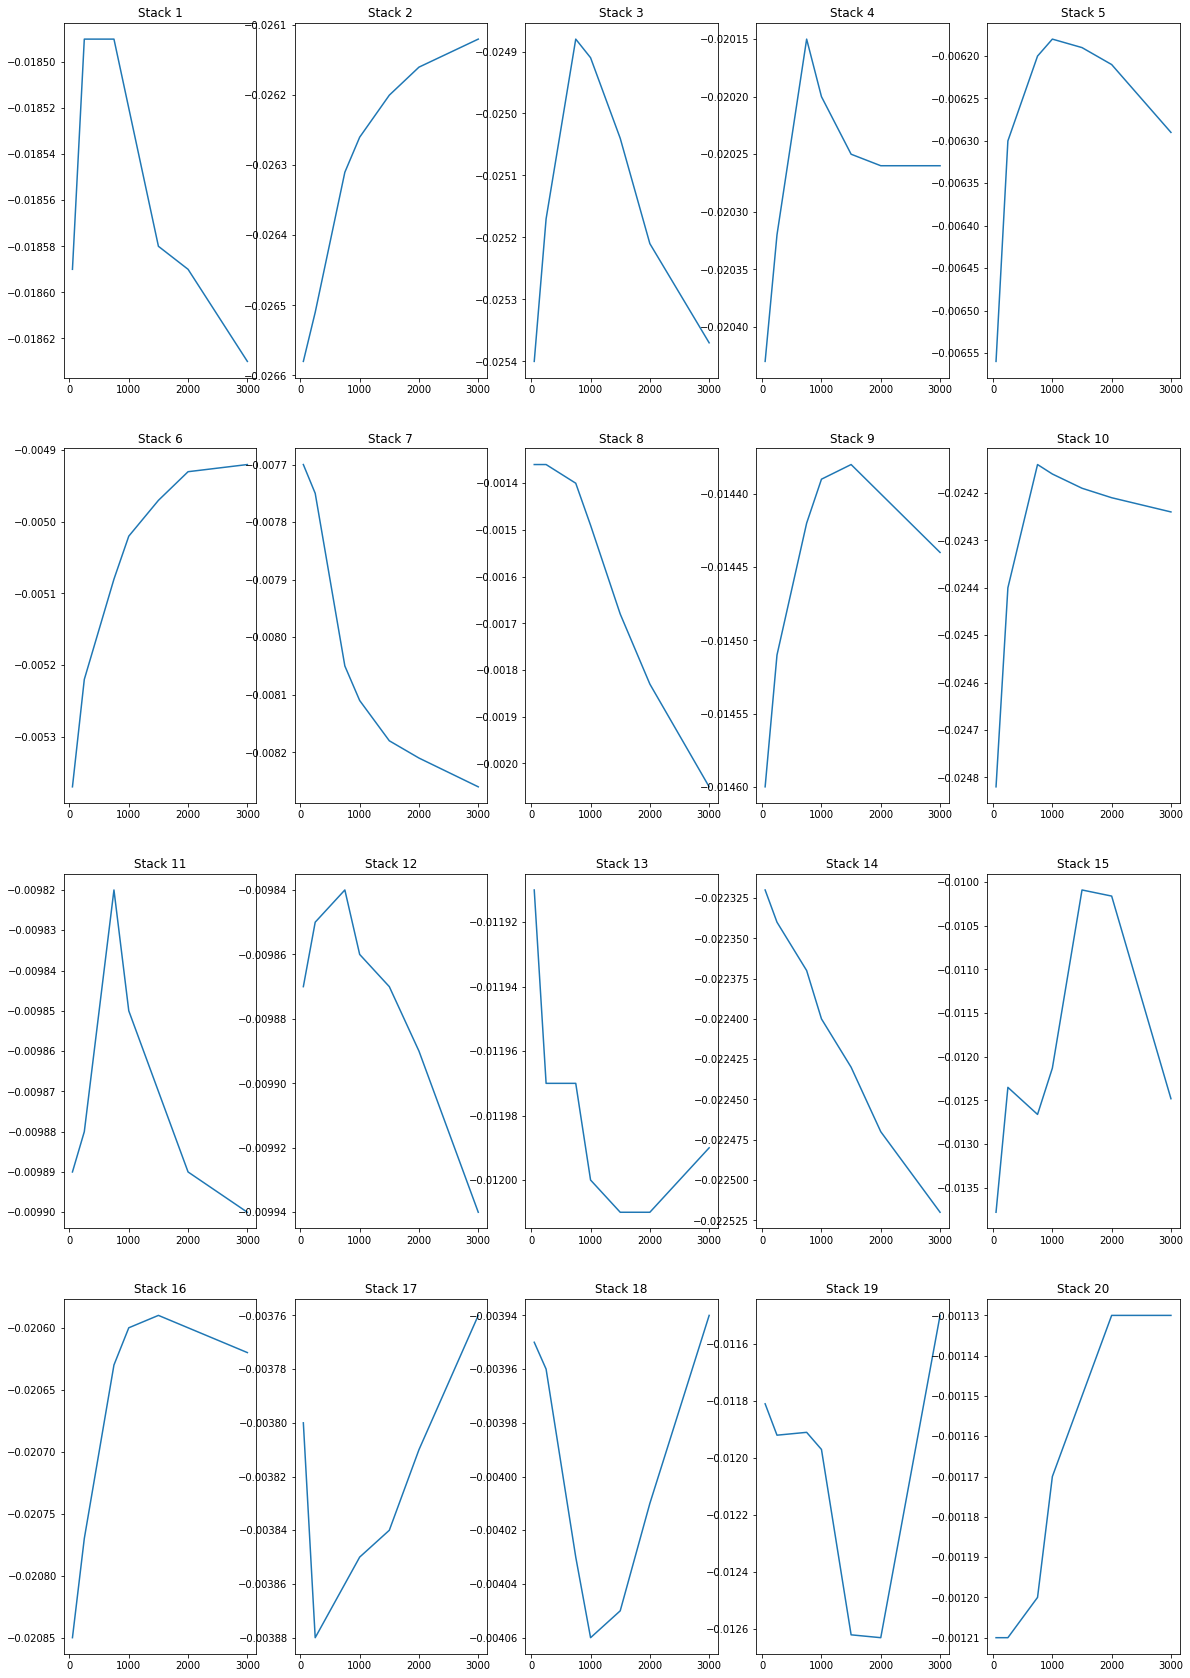

In [73]:
fig, axes = plt.subplots(4, 5)
fig.set_size_inches(20,30)
for stack in all_metrics.keys():
    j = int(stack.split('stack')[-1])
    i = j-1
    stack_metrics = np.array(all_metrics[stack])
    order=stack_metrics[:,0].argsort()
    metrics_T = stack_metrics[order].T

    # print(metrics_T)

    bfactors = metrics_T[0]
#     print(bfactors)

    defocus = metrics_T[1]
#     print(defocus)

    scores = metrics_T[2]
#     print(scores)

    fit = metrics_T[3]
#     print(fit)
    r = i//5
    c = i%5
    axes[r, c].plot(bfactors, scores)
    axes[r, c].set_title('Stack {}'.format(j))
    # Fine-tune figure; hide x ticks for tostack = 'stack16'p plots and y ticks for right plots

Across different thresholds (averaging across the bfactors)

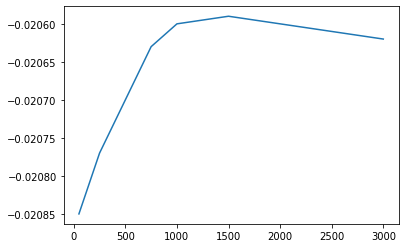

In [54]:
# fig 16
# plt.plot(bfactors,defocus)
plt.plot(bfactors,scores)
plt.show()

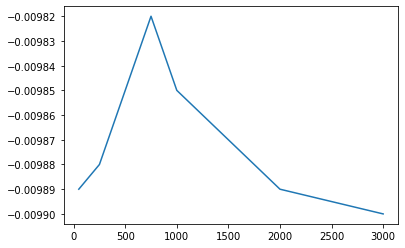

In [52]:
# fig 11
# plt.plot(bfactors,defocus)
plt.plot(bfactors,scores)
plt.show()

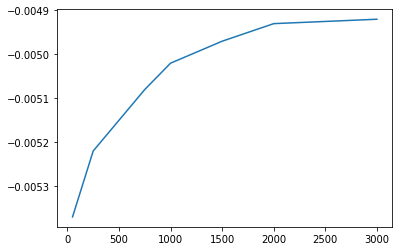

In [50]:
# fig 6
# plt.plot(bfactors,defocus)
plt.plot(bfactors,scores)
plt.show()

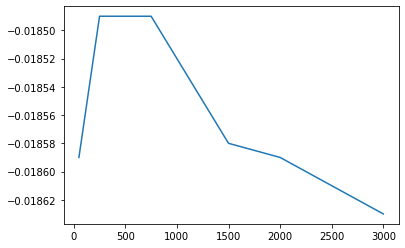

In [43]:
# fig 1
# plt.plot(bfactors,defocus)
plt.plot(bfactors,scores)
plt.show()

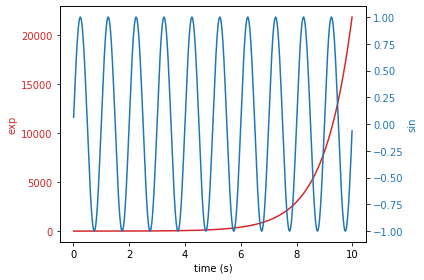

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()